In [75]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
import matplotlib as mpl
import matplotlib.animation as animation
from tqdm import tqdm

$$\frac{u(x,y,t+1)-u(x,y,t)}{\Delta t} + u(x,y,t)\left(\frac{u(x+1,y,t) - u(x-1,y,t)}{2\Delta x} + \frac{u(x,y+1,t) - u(x,y-1,t)}{2\Delta y}\right)
= v\frac{u(x+1,y,t) - 2u(x,y,t)+u(x-1,y,t)}{\Delta x^2} + v\frac{u(x,y+1,t) - 2u(x,y,t)+u(x,y-1,t)}{\Delta y^2}$$

$$u(x,y,t+1) = \Delta t\left(v\frac{u(x+1,y,t) - 2u(x,y,t)+u(x-1,y,t)}{\Delta x^2} + v\frac{u(x,y+1,t) - 2u(x,y,t)+u(x,y-1,t)}{\Delta y^2}- u(x,y,t)\left(\frac{u(x+1,y,t) - u(x-1,y,t)}{2\Delta x} + \frac{u(x,y+1,t) - u(x,y-1,t)}{2\Delta y}\right) \right)+u(x,y,t)$$













In [76]:
Nt = 500
Nx = 60
Ny = 60

x = np.linspace(-5,5,Nx)
y = np.linspace(-5,5,Nx)
t = np.linspace(0,10,Nt)

deltax = x[1] - x[0]
deltay = y[1] - y[0]
deltat = t[1] - t[0]

v = 0.3



In [77]:
def ui(x,y):
    
    return 5*np.exp(-((x**2)+(y**2)))

In [78]:
u = np.zeros((Nx,Ny,Nt))
for i in range(len(x)):
    for j in range(len(y)):
        u[i,j,0] = ui(x[i],y[j])

In [79]:
def GetSolution():
    for l in tqdm(range(0,len(t)-1)):
        for i in range(1,len(x)-1):
            for j in range(1,len(y)-1):
                du_dx_dos=v*(u[i+1,j,l]-2*u[i,j,l]+u[i-1,j,l])/(deltax**2)
                du_dy_dos=v*(u[i,j+1,l]-2*u[i,j,l]+u[i,j-1,l])/(deltay**2)
                du_dx=(u[i+1,j,l]-u[i-1,j,l])/(2*deltax)
                du_dy=(u[i,j+1,l]-u[i,j-1,l])/(2*deltay)
                u[i,j,l+1] = deltat*(du_dx_dos+du_dy_dos-u[i,j,l]*(du_dx+du_dy))+u[i,j,l]
    return None

In [80]:
GetSolution()

100%|████████████████████████████████████████████████████████████████████████████████| 499/499 [00:27<00:00, 17.96it/s]


<IPython.core.display.Javascript object>


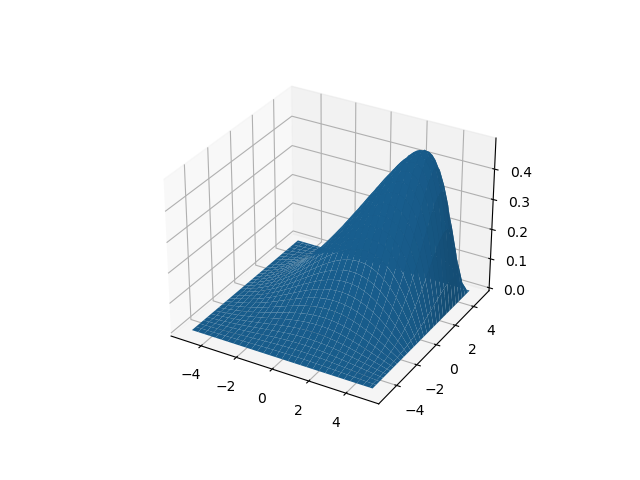

In [81]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
X,Y=np.meshgrid(x,y)
ax.plot_surface(X, Y, u[:,:,300])

la animación se encuentra en un archivo llamado "punto10.py"